## Introduction
 - In this file we use Cricket API for finding the information of cricketer.

#### API URL --> https://cricapi.com

### Importing all the necessary libraries.

In [1]:
import requests
import json 
from pprint import pprint
import pandas as pd
import IPython.display as Disp

Enter Player's Lastname: Dhoni


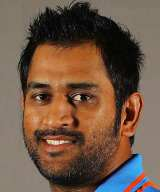


fullName --> Mahendra Singh Dhoni

born --> July 7, 1981, Ranchi, Bihar (now Jharkhand)

country --> India

majorTeams --> India,Asia XI,Bihar,Chennai Super Kings,Jharkhand,Rising Pune Supergiants

playingRole --> Wicketkeeper batsman

battingStyle --> Right-hand bat

bowlingStyle --> Right-arm medium


       listA firstClass T20Is   ODIs tests
10         0          0     -      0     0
5w         0          0     -      0     0
4w         0          0     -      0     0
SR      31.5          -     -   36.0     -
Econ    5.04       4.14     -   5.16  4.18
Ave    26.50          -     -  31.00     -
BBM     1/14          -     -   1/14     -
BBI     1/14          -     -   1/14     -
Wkts       2          0     -      1     0
Runs      53         87     -     31    67
Balls     63        126     -     36    96
Inns                        -      2     7
Mat      381        131    80    308    90


      listA firstClass   T20Is   ODIs  tests
50       80         47       1     66     33


In [2]:
key ='21GiETSidRPGMVad8jHOPuWCQY32'

Name = input("Enter Player's Lastname: ")

url = f"https://cricapi.com/api/playerFinder?apikey={key}&name={Name}"

resp = requests.get(url)

if resp.status_code == 200:
    data = resp.json()
    pid = data['data'][0]['pid']
    
    url1 = f"https://cricapi.com/api/playerStats?apikey={key}&pid={pid}"
    resp1 = requests.get(url1)
    
    if resp1.status_code == 200:
        data1 = resp1.json()
        img = data1['imageURL']
        display(Disp.Image(requests.get(img).content))
        print()
        
        details = ['fullName', 'born', 'country', 'majorTeams', 'playingRole','battingStyle','bowlingStyle']
        
        for i in details:
            print(f'{i} --> {data1[i]}')
            print()
        
        df=pd.DataFrame(data1['data']['bowling'])
        df1=pd.DataFrame(data1['data']['batting'])
        
        print(f"\n{df}")
        
        print()
        
        print(f"\n{df1}")
    else:
        print("Invalid")

else:
    print('Invallid URL')
      